In [ ]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt, math

In [ ]:
class BV:
  def __init__(self,Question,functionattrs=(100,10,1),considersamples=3,totalsamples=10000,uniformrange=(0,5)):
    self.Question,self.functionattrs,self.considersamples,self.totalsamples,self.uniformrange = (Question,functionattrs,considersamples,totalsamples,uniformrange)
    self.data,self.outofsampledata = None,np.linspace(uniformrange[0],uniformrange[1],totalsamples)
    self.y,self.gbars = None, None
    self.outofsampley = self.outofsampledata*self.outofsampledata*100+10*self.outofsampledata+1+np.random.normal(loc=0,scale=100,size=len(self.outofsampledata)) if Question==1 else np.sin(math.pi*self.outofsampledata)
  def prepare_data(self):
    self.data = np.random.uniform(self.uniformrange[0],self.uniformrange[1],self.considersamples)
    self.y = np.sin(math.pi*self.data).copy() if self.Question==2 else self.functionattrs[0]*(self.data*self.data)+self.functionattrs[1]*self.data+self.functionattrs[2]+np.random.normal(loc=0,scale=1,size=len(self.data))
  def applyf(self,x,coeff,deg):
    if len(coeff)>0:
      return np.ones_like(x,dtype=float)*coeff[0] if deg==0 else x*coeff[0]+coeff[1] if deg==1 else x*x*coeff[0]+x*coeff[1]+coeff[2]
    else:
      return np.sin(math.pi*x)
  def fit(self,degree,iters=1000):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1,degree+1,figsize=(16,5))
    axs[0].set_title("Plots of gds and original polynomial")
    gbars,bias,variance = [],[],[]
    for i in range(degree+1):
      gds = []
      gbar = np.zeros(i+1,dtype=float)
      axs[i].plot(self.outofsampledata,self.outofsampley)
      for iter in range(iters):
        self.prepare_data()
        coefficients = np.polyfit(self.data,self.y,i)
        gds.append(coefficients)
        gbar+=coefficients
        axs[i].plot(self.outofsampledata,self.applyf(self.outofsampledata,coefficients,i))
      gbar/=iters
      gds = np.array(gds)
      temp1 = gds-gbar
      variancetemp = 0
      for k in range(len(temp1)):
        variancetemp+=(np.sum((self.applyf(self.outofsampledata,temp1[k],i))**2))
      variance.append(variancetemp/(len(self.outofsampledata)*iters))
      bias.append(np.sum((self.applyf(self.outofsampledata,gbar,i)-self.applyf(self.outofsampledata,self.functionattrs,i))**2)/len(self.outofsampledata)) if self.Question==1 else bias.append(np.sum((self.applyf(self.outofsampledata,gbar,i)-self.applyf(self.outofsampledata,[],i))**2)/len(self.outofsampledata))
      gbars.append(gbar.copy())
    self.gbars = gbars
    plt.show()
    return gbars, bias, variance

In [ ]:
lab = BV(1)
lab2 = BV(2,considersamples=2,uniformrange=(-1,1))

In [ ]:
lab.prepare_data()
lab2.prepare_data()

In [ ]:
gbars, bias, variance = lab.fit(2)

In [ ]:
gbars

In [ ]:
bias

In [ ]:
variance

In [ ]:
print(f"Degree where Bias-Variance Error is Minimum:{np.argmin(bias+variance)}")

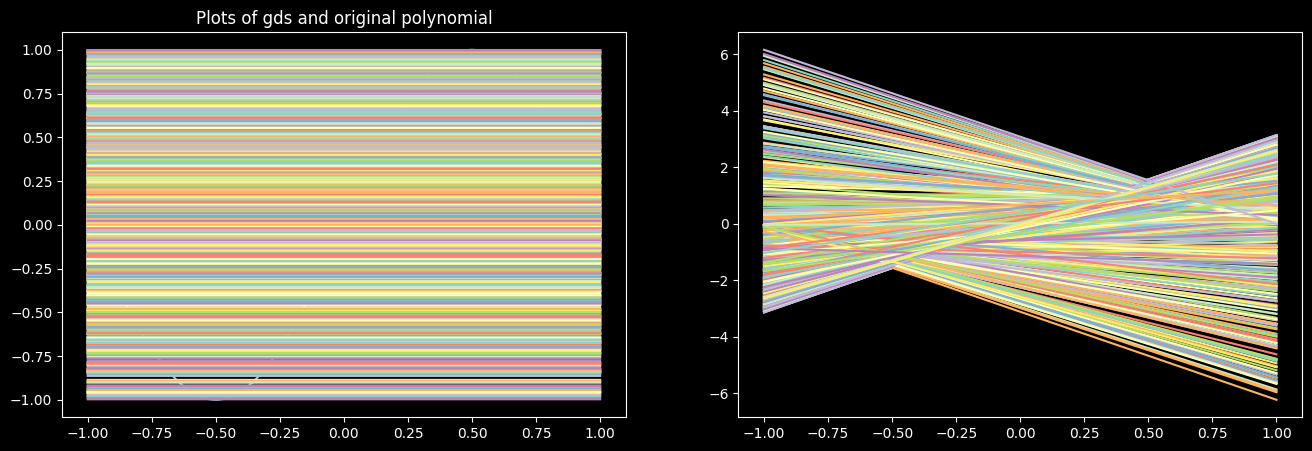

In [ ]:
gbars, bias, variance = lab2.fit(1)

In [ ]:
gbars

[array([0.04265396]), array([ 0.77660037, -0.01700986])]

In [ ]:
bias

[0.5017693598867984, 0.20696589646630395]

In [ ]:
variance

[0.2493878135018806, 1.542433916962876]

In [ ]:
print(f"Degree where Bias-Variance Error is Minimum:{np.argmin(bias+variance)}")

Degree where Bias-Variance Error is Minimum:1
